In [109]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats.stats import pearsonr
from statsmodels.formula.api import ols
from scipy.stats import linregress

# import plotly.plotly as py
# import plotly.graph_objs as go

In [110]:
#import and read excel file on mental health
excelfile=("../Resources/SAMHDA/SAMHDA_MentalIllnessbyState/Combined_mentalillness_2010-17.xlsx")
df_illness=pd.read_excel(excelfile)
df_illness['estimate']=df_illness['estimate']*100
df_illness.head()

,outcome,age_group,year_pair,year,state,estimate,ci_lower,ci_upper
0,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Alabama,21.7199,0.193466,0.242966
1,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Alaska,19.2302,0.168741,0.218289
2,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Arizona,19.7642,0.171977,0.226091
3,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Arkansas,20.6251,0.180644,0.234450
4,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,California,16.3427,0.150571,0.177151


In [111]:
#import and read excel file on suicides
excelfile=("../Resources/CDC/SuicideRates/Suicide_combined_byState.xlsx")
df_suicide=pd.read_excel(excelfile)
df_suicide.head()

,STATE abbr,RATE,DEATHS,year,State
0,AL,11.5,535.0,2005,Alabama
1,AK,19.9,131.0,2005,Alaska
2,AZ,16.4,945.0,2005,Arizona
3,AR,14.3,400.0,2005,Arkansas
4,CA,9.1,3206.0,2005,California


In [112]:
#merging 2 files based on year and state

#add a new column year-state to mental illness data
df_illness['year-state']=df_illness['year'].map(str)+df_illness['state']
df_illness.head()


#add a new column year-state to suicide data
df_suicide['year-state']=df_suicide['year'].map(str)+df_suicide['State']
df_suicide.head()

#merging files
df_illness_suicide=pd.merge(df_illness, df_suicide, on="year-state", how="left",suffixes=('_ill','_sui'))
df_illness_suicide.head()

#suicide data available 2014 onwards, filtering data frame accordingly
df_ill_sui_201417=df_illness_suicide.loc[df_illness_suicide['year_ill']>2013,:]
df_ill_sui_201417=df_ill_sui_201417.loc[df_ill_sui_201417['state']!='District of Columbia',:]
df_ill_sui_201417.head()

# df_ill_sui_201417.to_csv("Test.csv")

,outcome,age_group,year_pair,year_ill,state,estimate,ci_lower,ci_upper,year-state,STATE abbr,RATE,DEATHS,year_sui,State
153,Any Mental Illness in the Past Year,18 or Older,2013-14,2014,Alabama,19.5067,0.172477,0.219831,2014Alabama,AL,14.5,715.0,2014.0,Alabama
154,Any Mental Illness in the Past Year,18 or Older,2013-14,2014,Alaska,18.1217,0.160989,0.203370,2014Alaska,AK,22.1,167.0,2014.0,Alaska
155,Any Mental Illness in the Past Year,18 or Older,2013-14,2014,Arizona,18.5888,0.164041,0.209915,2014Arizona,AZ,18.0,1244.0,2014.0,Arizona
156,Any Mental Illness in the Past Year,18 or Older,2013-14,2014,Arkansas,19.9982,0.178473,0.223379,2014Arkansas,AR,17.3,515.0,2014.0,Arkansas
157,Any Mental Illness in the Past Year,18 or Older,2013-14,2014,California,18.1413,0.169561,0.193899,2014California,CA,10.5,4214.0,2014.0,California


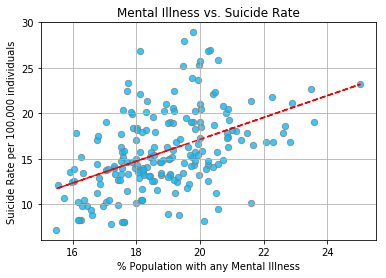

In [113]:
#scatter plot-all years together

scatter_ill_sui=df_ill_sui_201417.plot.scatter(x='estimate',
                                               y='RATE',
                                               grid=True,
                                               title='Mental Illness vs. Suicide Rate',
                                               color='deepskyblue',
                                               edgecolor='grey',
                                               s=40,
                                               alpha=.8
                                               )
plt.xlabel('% Population with any Mental Illness')
plt.ylabel('Suicide Rate per 100,000 individuals')

# z = np.polyfit(df_ill_sui_201417['estimate'], df_ill_sui_201417['RATE'], 1)
# p = np.poly1d(z)
# plt.plot(df_ill_sui_201417['estimate'],p(df_ill_sui_201417['estimate']),"r--")

# Trend line
(slope, intercept, _, _, _) = linregress(df_ill_sui_201417['estimate'], df_ill_sui_201417['RATE'])
fit = slope * df_ill_sui_201417['estimate'] + intercept
plt.plot(df_ill_sui_201417['estimate'], fit, 'r--')


plt.savefig("../Images/Mental Illness vs. Suicide Rate.png")
plt.show()

In [114]:
#correlation coefficient between mental illness and suicide rate
print(np.corrcoef(df_ill_sui_201417['estimate'], df_ill_sui_201417['RATE']))

[[1.         0.46103366]
 [0.46103366 1.        ]]


In [115]:
#Regression analysis - mental illness and suicide rate
mod = ols(formula='RATE~estimate', data=df_ill_sui_201417)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   RATE   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     53.45
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           6.42e-12
Time:                        20:32:05   Log-Likelihood:                -557.32
No. Observations:                 200   AIC:                             1119.
Df Residuals:                     198   BIC:                             1125.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.9050      3.117     -2.215      0.0

Text(0.5, 0, 'Year')

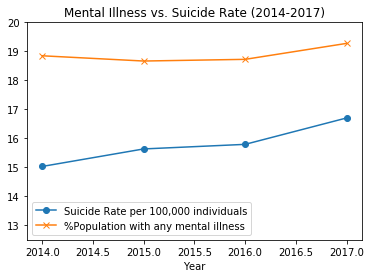

In [116]:
#for line chart

plt.subplot

df_ill_sui_grpby=df_ill_sui_201417.groupby(['year_ill'])
sui_rate=df_ill_sui_grpby['RATE'].mean()
ill_rate=df_ill_sui_grpby['estimate'].mean()

line_chart=sui_rate.plot(kind='line',
                         marker='o',
                         label='Suicide Rate per 100,000 individuals',
                         title='Mental Illness vs. Suicide Rate (2014-2017)')

line_chart=ill_rate.plot(kind='line',
                         marker='x',
                         label='%Population with any mental illness')

line_chart.set_ylim(12.5,20)
line_chart.legend()

plt.xlabel('Year')


In [117]:
#import and read excel file on income
csvfile=("../Resources/BEA/PersonalIncome_reformatted.csv")
df_income=pd.read_csv(csvfile)
df_income.head()

,GeoName,Description,Year,value
0,United States,Disposable personal income (millions of dollars),2010,11305991.0
1,United States,Population (persons) 1/,2010,309338421.0
2,United States,Per capita disposable personal income (dollars...,2010,36549.0
3,Alabama,Disposable personal income (millions of dollars),2010,148758.8
4,Alabama,Population (persons) 1/,2010,4785579.0


In [118]:

#add a new column year-state to income data
df_income['year-state']=df_income['Year'].map(str)+df_income['GeoName']
df_income.head()

#filtering the data frame to get Per capita disposable personal income
df_income_percapita=df_income.loc[df_income['Description']=='Per capita disposable personal income (dollars) 2/',:]
df_income_percapita.head()

#merging files
df_illness_income=pd.merge(df_illness, df_income_percapita, on="year-state", how="left",suffixes=('_ill','_inc'))
df_illness_income.head()

,outcome,age_group,year_pair,year,state,estimate,ci_lower,ci_upper,year-state,GeoName,Description,Year,value
0,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Alabama,21.7199,0.193466,0.242966,2011Alabama,Alabama,Per capita disposable personal income (dollars...,2011,31807.0
1,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Alaska,19.2302,0.168741,0.218289,2011Alaska,Alaska,Per capita disposable personal income (dollars...,2011,47766.0
2,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Arizona,19.7642,0.171977,0.226091,2011Arizona,Arizona,Per capita disposable personal income (dollars...,2011,31672.0
3,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Arkansas,20.6251,0.180644,0.234450,2011Arkansas,Arkansas,Per capita disposable personal income (dollars...,2011,30723.0
4,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,California,16.3427,0.150571,0.177151,2011California,California,Per capita disposable personal income (dollars...,2011,40603.0


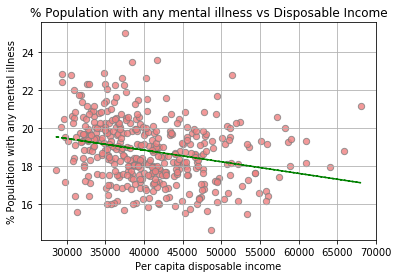

In [119]:
#scatter plot-all years together

scatter_ill_inc=df_illness_income.plot.scatter(x='value',
                                               y='estimate',
                                               grid=True,
                                               title='% Population with any mental illness vs Disposable Income',
                                               color='lightcoral',
                                               edgecolor='grey',
                                               s=40,
                                               alpha=.8)
plt.xlabel('Per capita disposable income')
plt.ylabel('% Population with any mental illness')

#Trend line
# z = np.polyfit(df_illness_income['value'], df_illness_income['estimate'], 1)
# p = np.poly1d(z)
# plt.plot(df_illness_income['value'],p(df_illness_income['value']),"g--")

(slope, intercept, _, _, _) = linregress(df_illness_income['value'], df_illness_income['estimate'])
fit = slope * df_illness_income['value'] + intercept
plt.plot(df_illness_income['value'], fit, 'g--')


plt.savefig("../Images/Mental Illness vs. Income.png")

plt.show()

In [120]:
#correlation coefficient between mental illness and income
print(np.corrcoef(df_illness_income['value'], df_illness_income['estimate']))

[[ 1.         -0.25567345]
 [-0.25567345  1.        ]]


In [121]:
#Regression analysis - mental illness and income
mod = ols(formula='estimate~value', data=df_illness_income)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               estimate   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     28.40
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           1.64e-07
Time:                        20:32:09   Log-Likelihood:                -768.10
No. Observations:                 408   AIC:                             1540.
Df Residuals:                     406   BIC:                             1548.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.2930      0.474     44.926      0.0

In [122]:
#import and read excel file on income
csvfile=("../Resources/BEA/GDPbyStateMn_reformatted.csv")
df_gdp=pd.read_csv(csvfile)
df_gdp.head()

,GeoName,value,year
0,United States*,14992052.0,2010
1,Alabama,174753.0,2010
2,Alaska,52882.5,2010
3,Arizona,248210.0,2010
4,Arkansas,101690.0,2010


In [123]:
#add a new column year-state to gdp data
df_gdp['year-state']=df_gdp['year'].map(str)+df_gdp['GeoName']
df_gdp.head()


#merging files
df_illness_gdp=pd.merge(df_illness, df_gdp, on="year-state", how="left",suffixes=('_ill','_gdp'))
df_illness_gdp.head()

,outcome,age_group,year_pair,year_ill,state,estimate,ci_lower,ci_upper,year-state,GeoName,value,year_gdp
0,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Alabama,21.7199,0.193466,0.242966,2011Alabama,Alabama,181349.8,2011
1,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Alaska,19.2302,0.168741,0.218289,2011Alaska,Alaska,56259.9,2011
2,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Arizona,19.7642,0.171977,0.226091,2011Arizona,Arizona,257947.8,2011
3,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Arkansas,20.6251,0.180644,0.234450,2011Arkansas,Arkansas,106085.4,2011
4,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,California,16.3427,0.150571,0.177151,2011California,California,2050056.8,2011


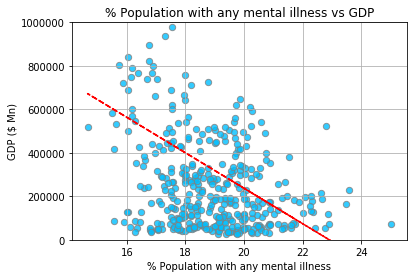

In [124]:
#scatter plot-all years together

scatter_ill_gdp=df_illness_gdp.plot.scatter(x='estimate',
                                            y='value',
                                            grid=True,
                                            title='% Population with any mental illness vs GDP',
                                            color='deepskyblue',
                                            edgecolor='grey',
                                            s=40,
                                            alpha=.8
                                            )

plt.xlabel('% Population with any mental illness')
plt.ylabel('GDP ($ Mn)')

plt.ylim(0,1000000)

z = np.polyfit(df_illness_gdp['estimate'], df_illness_gdp['value'], 1)
p = np.poly1d(z)
plt.plot(df_illness_gdp['estimate'],p(df_illness_gdp['estimate']),"r--")



plt.savefig("../Images/Mental Illness vs. GDP.png")

plt.show()

In [125]:
#correlation coefficient between mental illness and gdp
print(np.corrcoef(df_illness_gdp['estimate'], df_illness_gdp['value']))

[[ 1.         -0.31929707]
 [-0.31929707  1.        ]]


In [126]:
#Regression analysis - mental illness and gdp
mod = ols(formula='estimate~value', data=df_illness_gdp)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               estimate   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     46.09
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           4.02e-11
Time:                        20:32:13   Log-Likelihood:                -759.95
No. Observations:                 408   AIC:                             1524.
Df Residuals:                     406   BIC:                             1532.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.2216      0.099    194.262      0.0

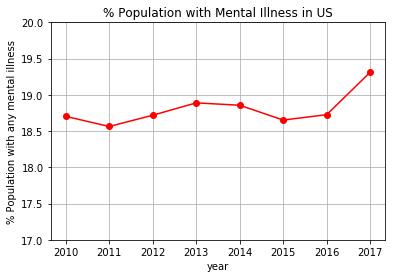

In [183]:
# mental illness trend
df_illness_yr=df_illness.groupby(['year'])
df_illness_yr['estimate'].mean().plot(kind='line',
                                      marker='o',
                                      color='red',
                                      grid=True,
                                      title='% Population with Mental Illness in US')
plt.ylim(17,20)
plt.ylabel('% Population with any mental illness')

plt.savefig("../Images/Trend: % Population with any mental illness.png")


/anaconda3/envs/PythonEnv/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


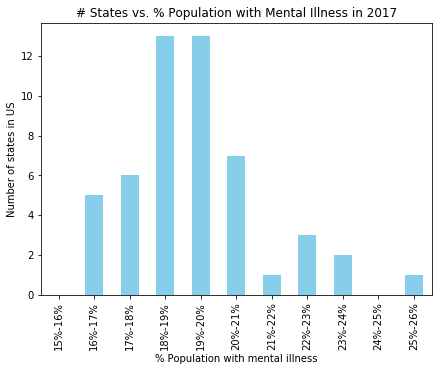

In [186]:
# mental illness distribution-2017
df_illness_2017=df_illness.loc[df_illness['year']==2017,:]

bins=[15,16,17,18,19,20,21,22,23,24,25,26]
groups=['15%-16%','16%-17%','17%-18%','18%-19%','19%-20%','20%-21%','21%-22%','22%-23%','23%-24%','24%-25%','25%-26%']

df_illness_2017['bins']=pd.cut(df_illness_2017['estimate'],bins,labels=groups)

df_illness_2017_bins=df_illness_2017.groupby(['bins'])

df_illness_2017_bins['state'].count().plot(kind='bar',
                                           figsize=(7,5),
                                           color='skyblue',
                                           title='# States vs. % Population with Mental Illness in 2017',
                                           )

plt.xlabel('% Population with mental illness')
plt.ylabel('Number of states in US')

plt.savefig("../Images/# States vs. % Population with Mental Illness in 2017.png")